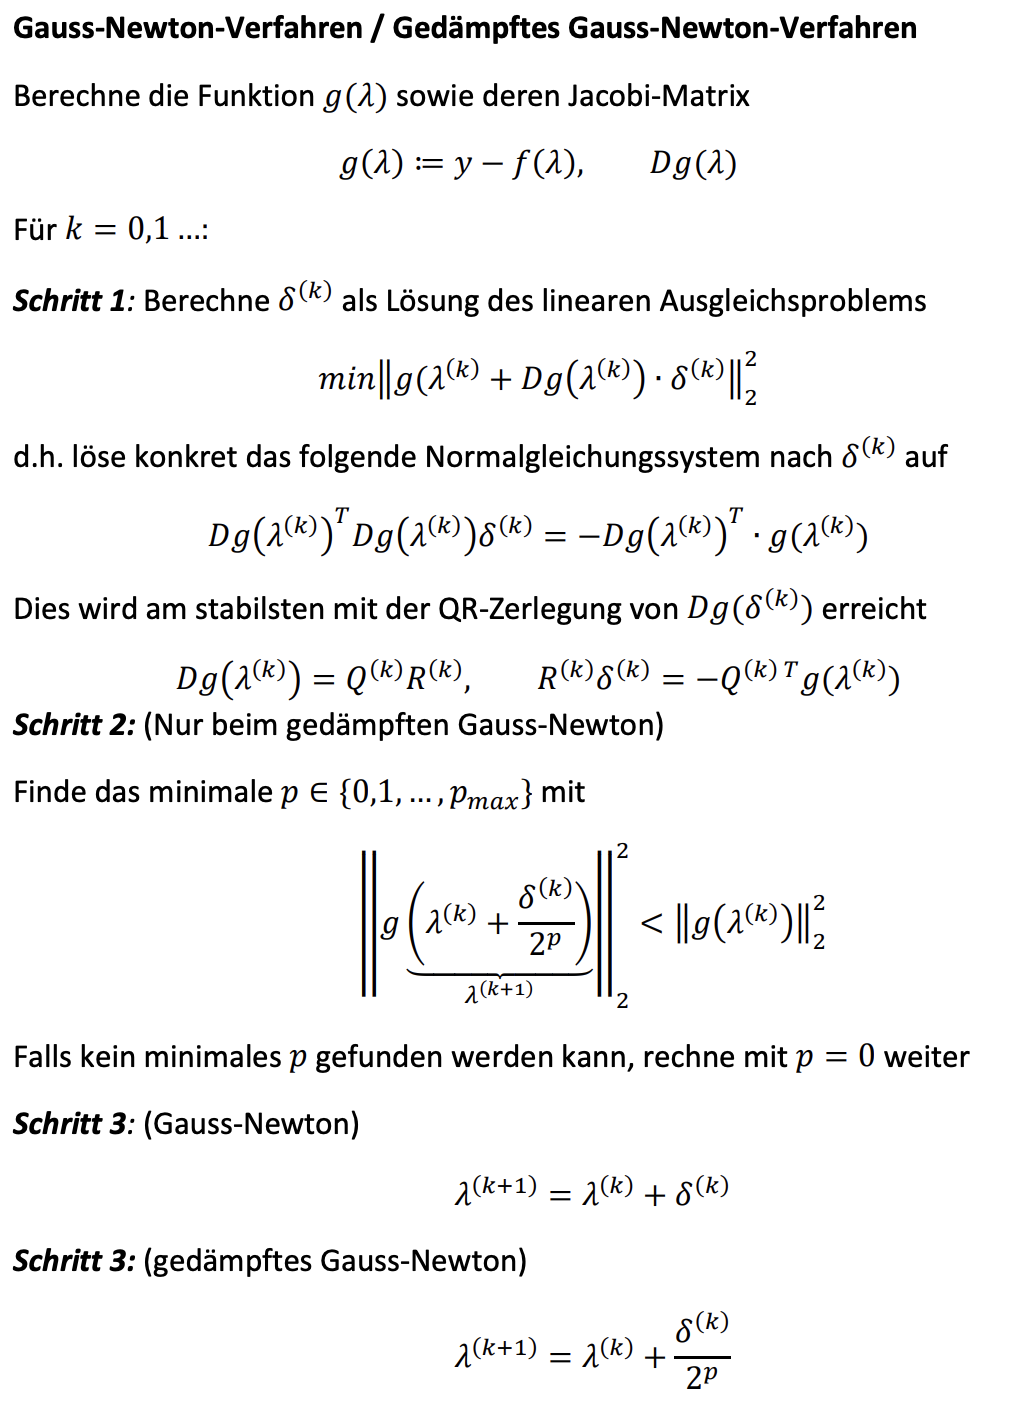

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Letzter Lambda-Wert: Gefittete Parameter


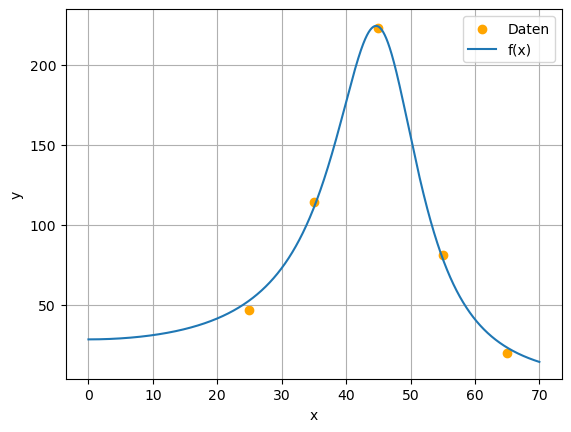

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display, Math

"""INPUT"""
x = np.array([25, 35, 45, 55, 65], dtype=np.float64)  # Messwerte xi
y = np.array([47, 114, 223, 81, 20], dtype=np.float64)  # Messwerte yi

# Symbole für Ansatzfunktion
p = sp.symbols("p0 p1 p2")

# Ansatzfunktion
def f(x, p):
    return p[0] / ((((x**2) - p[1]**2)**2) + p[2]**2)

# Startvektor für Iteration
lam0 = np.array([10**8, 50, 600], dtype=np.float64)  

# Fehlertoleranz für Abbruch
tol = 1e-3
max_iter = 30
pmax = 4  # Maximale Dämpfung

# Parameter für Plot
a, b = 0, 70
steps = 0.001
"""INPUT"""

sp.init_printing()

def gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax):
    k = 0
    lam = np.copy(lam0)
    increment = tol + 1
    err_func = np.linalg.norm(g(lam)) ** 2

    while k < max_iter and increment > tol:
        display(Math(f"\\text{{Iteration}}: {k+1}"))
        # Berechnung der Jacobimatrix Dg(lam)
        Df = Dg(lam)
        
        # QR-Zerlegung von Df
        Q, R = np.linalg.qr(Df)
        
        # Berechnung des Inkrements delta
        delta = np.linalg.solve(R, -Q.T @ g(lam)).flatten()
        
        # Bestimmung der optimalen Dämpfung p
        p = 0
        while p < pmax and np.linalg.norm(g(lam + delta / (2**p))) ** 2 >= err_func:
            display(Math(f"\\text{{Aktuelles }} p: {p}"))
            p += 1
        if p >= pmax and np.linalg.norm(g(lam + delta / (2**p))) ** 2 >= err_func:
            display(Math("\\text{Kein minimales } p \\text{ gefunden, daher } p = 0"))
            p = 0
        
        # Update des Vektors Lambda
        lam_new = lam + delta / 2**p
        err_func = np.linalg.norm(g(lam_new), 2) ** 2
        increment = np.linalg.norm(delta / 2**p, 2)
        
        # Ausgabe der Zwischenergebnisse mit IPython.display
        
        display(Math(f"Dg = {sp.latex(sp.Matrix(Df))}"))
        display(Math(f"Q = {sp.latex(sp.Matrix(Q))}"))
        display(Math(f"-Q^T = {sp.latex(sp.Matrix(-Q.T))}"))
        display(Math(f"R = {sp.latex(sp.Matrix(R))}"))
        display(Math(f"g(\\lambda) = {sp.latex(sp.Matrix(g(lam_new)))}"))
        display(Math(f"\\delta = {sp.latex(sp.Matrix(delta))}"))
        display(Math(f"\\lambda = {sp.latex(sp.Matrix(lam_new))}"))
        display(Math(f"\\text{{Inkrement}} = {increment}"))
        display(Math(f"\\text{{Fehlerfunktional}} = {err_func}"))
        
        
        # Aktualisierung von lam für die nächste Iteration
        lam = lam_new
        k += 1
    
    print("Letzter Lambda-Wert: Gefittete Parameter")
    return lam, k

def showPlot(lam, x, y, f):
    t = sp.symbols("t")
    F = f(t, lam)
    F = sp.lambdify([t], F, "numpy")
    t = np.arange(a, b, steps)
    plt.scatter(x, y, color="orange", label="Daten")
    plt.plot(t, F(t), label="f(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()
    plt.show()

g = sp.Matrix([y[k] - f(x[k], p) for k in range(len(x))])
Dg = g.jacobian(p)
g = sp.lambdify([p], g, "numpy")
Dg = sp.lambdify([p], Dg, "numpy")

# Starte den Gauss-Newton-Algorithmus und zeige Zwischenergebnisse an
lam_damp, n = gauss_newton_d(g, Dg, lam0, tol, max_iter, 5)

# Zeige den finalen Plot der Funktion
showPlot(lam_damp, x, y, f)
